In [1]:
# The project is to understand:
#1) Average listed price in the Seattle
#2) factors impact the listed price
#3) price prediction for properties
#4) Positive and negative reviews for each host  
#5) factors impact the review of properties

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import statistics
import math
%matplotlib inline

In [2]:
listings_raw=pd.read_csv('./listings.csv')
print("size of listing file", listings_raw.shape)
print(listings_raw.columns)
listings_raw.head()

size of listing file (3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'b

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# check "NaN" in the data

def checkNaN (dataframe):
    missing_col=dataframe.columns[dataframe.isnull().any()]
    missing_per=(dataframe[missing_col].isnull().sum()/dataframe.shape[0]*100).sort_values()
    return missing_per

print("columns with missing value       (100%)\n",checkNaN(listings_raw))

columns with missing value       (100%)
 beds                             0.026192
property_type                    0.026192
host_identity_verified           0.052383
host_has_profile_pic             0.052383
host_total_listings_count        0.052383
host_name                        0.052383
host_since                       0.052383
host_listings_count              0.052383
host_picture_url                 0.052383
host_thumbnail_url               0.052383
host_is_superhost                0.052383
bedrooms                         0.157150
zipcode                          0.183342
host_location                    0.209534
bathrooms                        0.419068
summary                          4.635935
host_neighbourhood               7.857517
xl_picture_url                   8.381351
medium_url                       8.381351
thumbnail_url                    8.381351
neighbourhood                   10.895757
host_response_rate              13.698271
host_response_time              13.

In [60]:
# Convert the type of price from str to float
listings_raw['listed_price']=listings_raw['price'].str.replace('$','',regex=True)
listings_raw['listed_price']=listings_raw['listed_price'].str.replace(',','',regex=True)
listings_raw['listed_price']=listings_raw['listed_price'].astype('float')
listings_raw['listed_price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: listed_price, Length: 3818, dtype: float64

In [61]:
price_range=listings_raw['listed_price']
print('overview of price of bnb in Seattle area\n')
price_range.describe()

overview of price of bnb in Seattle area



count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: listed_price, dtype: float64

<AxesSubplot:xlabel='listed_price', ylabel='Count'>

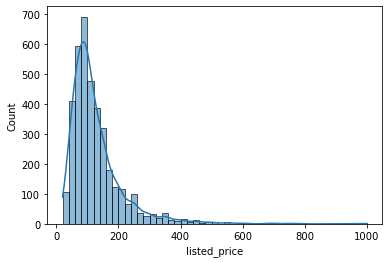

In [28]:
sns.histplot(data=price_range, kde=True, binwidth=20)

<AxesSubplot:>

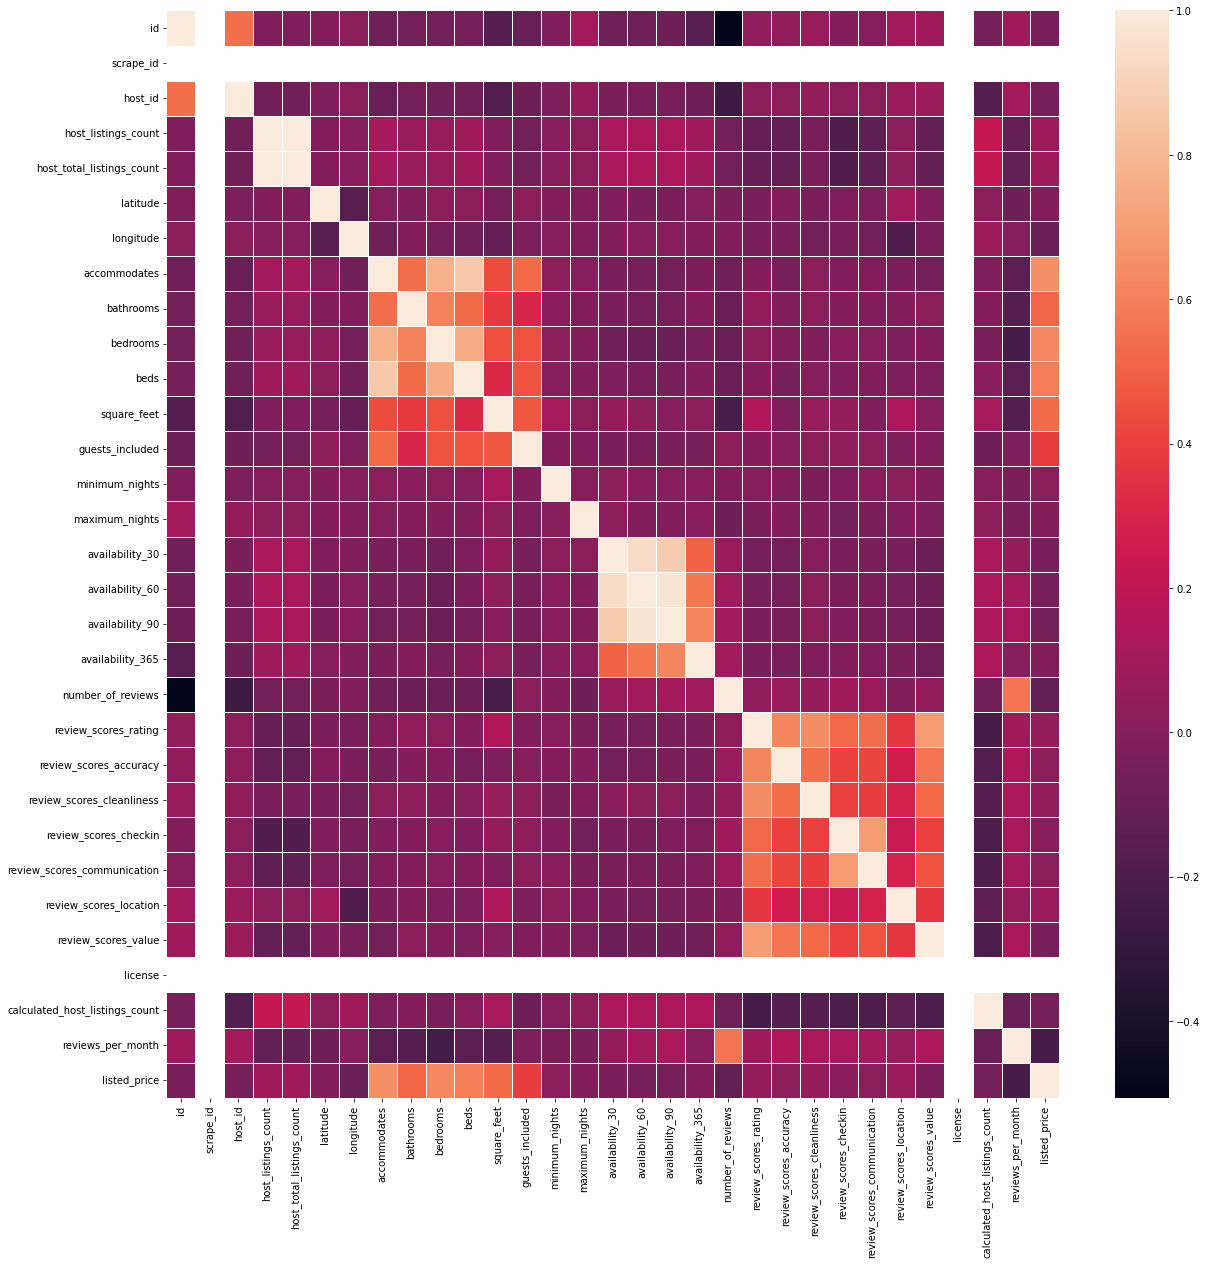

In [7]:
#look for parameters corellated to price
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(listings_raw.corr(), linewidths=.5, ax=ax)

In [62]:
cor=listings_raw.corr().sort_values(by='listed_price',ascending=False)
cor['listed_price']


listed_price                      1.000000
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
bathrooms                         0.516424
guests_included                   0.392875
host_total_listings_count         0.093962
host_listings_count               0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
latitude                         -0.008904
availability_365                 -0.015550
availability_30                  -0.037653
review_scores_value              -0.041776
id                               -0.046289
availability_60                  -0.049336
host_id    

In [83]:

df.groupby('property_type')['listed_price'].describe()


,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,1708.0,122.932670,66.617706,20.0,85.00,110.0,149.00,999.0
Bed & Breakfast,37.0,112.054054,55.840022,30.0,70.00,99.0,146.00,299.0
Boat,8.0,282.375000,281.327434,75.0,92.50,150.0,356.75,775.0
Bungalow,13.0,115.615385,75.226922,65.0,75.00,95.0,110.00,349.0
Cabin,21.0,104.666667,55.218053,52.0,85.00,95.0,100.00,300.0
Camper/RV,13.0,120.461538,95.375237,45.0,75.00,82.0,120.00,375.0
Chalet,2.0,98.500000,51.618795,62.0,80.25,98.5,116.75,135.0
Condominium,91.0,151.109890,111.091099,50.0,99.00,115.0,155.00,700.0
Dorm,2.0,39.500000,2.121320,38.0,38.75,39.5,40.25,41.0


<AxesSubplot:title={'center':'listed_price'}, xlabel='property_type'>

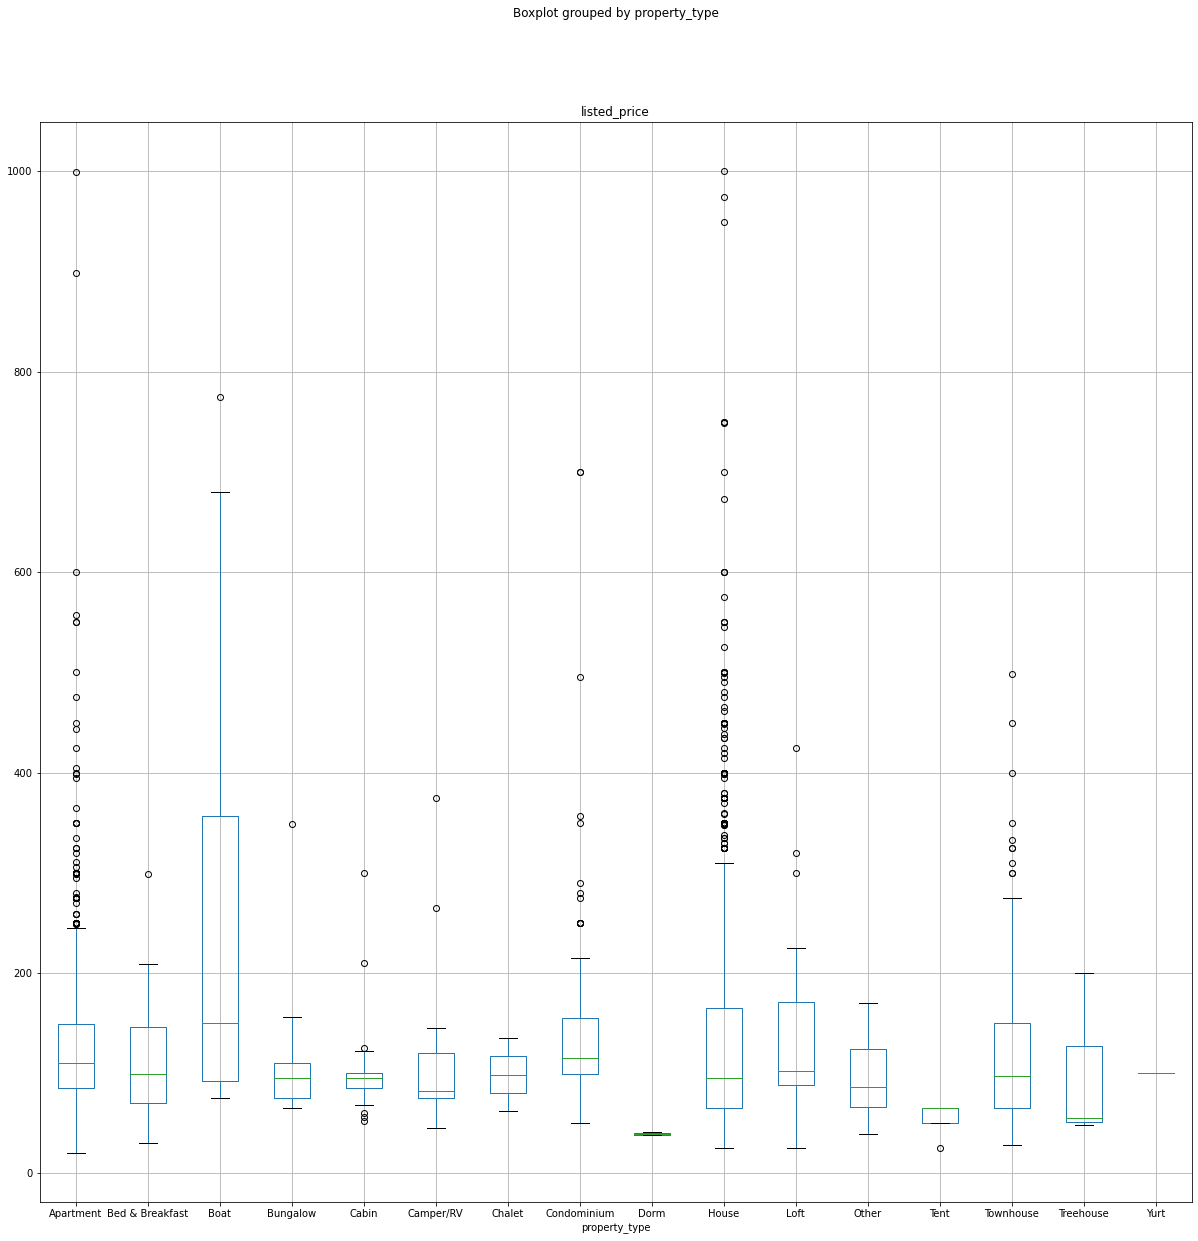

In [85]:
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.barplot( x="property_type",y="listed_price", data=df)

df.boxplot('listed_price', by='property_type', figsize=(20, 20))

In [99]:
# Transforming Data for Normality
Stas=df[['property_type', 'listed_price']]
Stas['listed_price']=Stas['listed_price'].apply(lambda x:math.sqrt(x))


C:\Users\lgy\AppData\Local\Temp/ipykernel_17576/1612211811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stas['listed_price']=Stas['listed_price'].apply(lambda x:math.sqrt(x))


<AxesSubplot:title={'center':'listed_price'}, xlabel='property_type'>

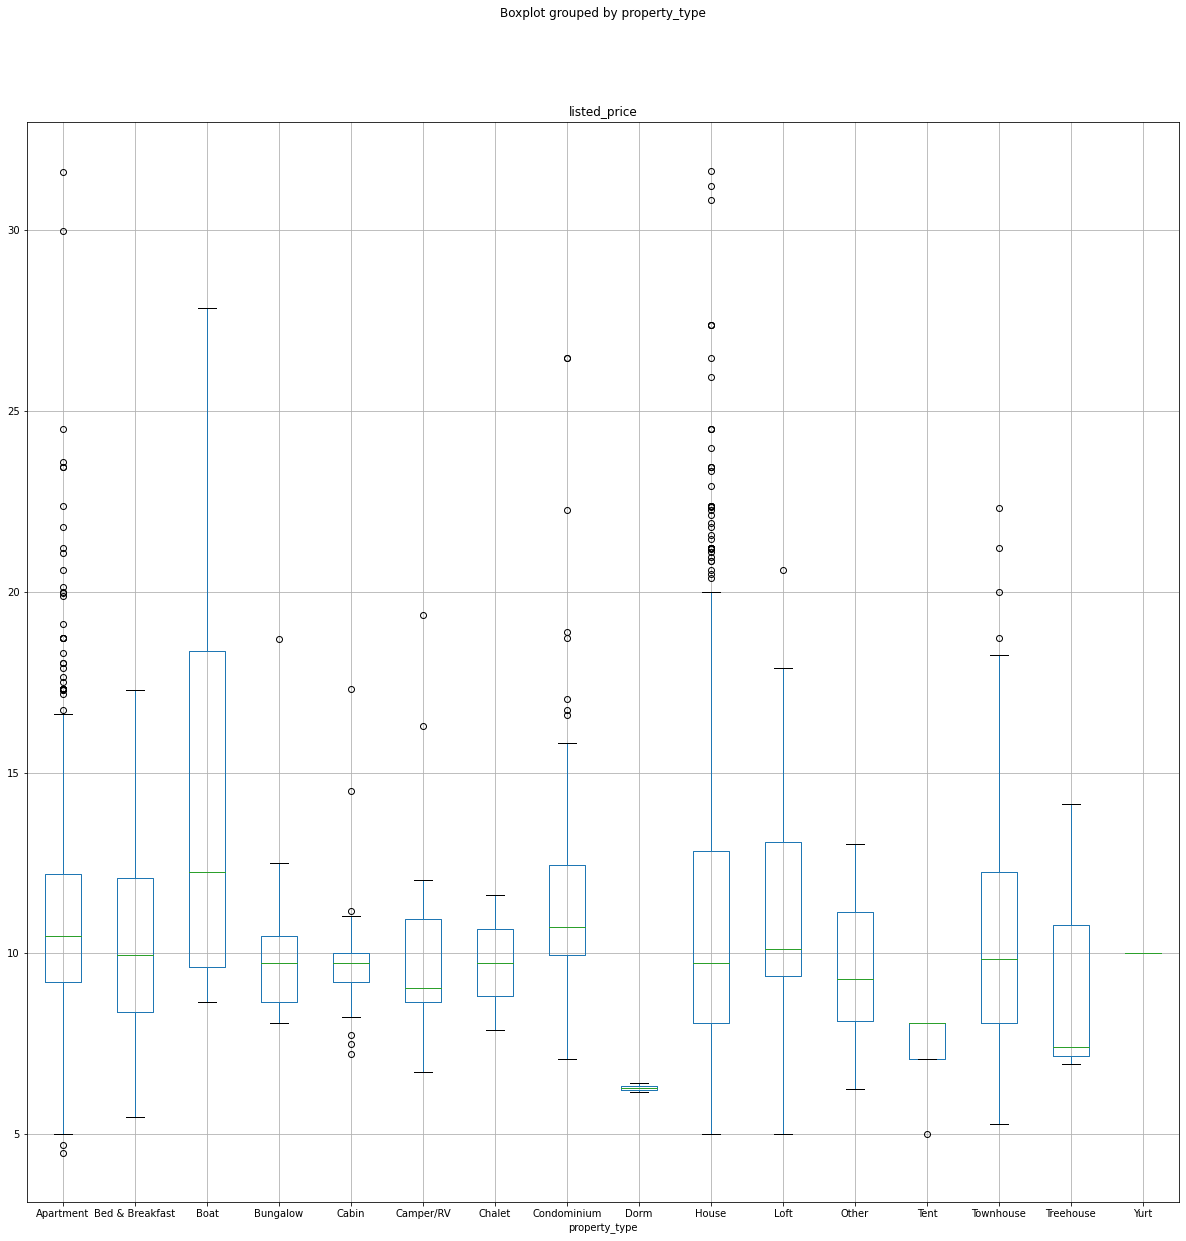

In [98]:
Stas.boxplot('listed_price', by='property_type', figsize=(20, 20)) 
#Quick data transformation failure, price still not follows normal distribution. Use the original data for analysis

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


mod = ols('listed_price ~ property_type', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df         F    PR(>F)
property_type  4.142978e+05    15.0  3.422391  0.000008
Residual       3.067536e+07  3801.0       NaN       NaN


In [68]:
df['listed_price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: listed_price, Length: 3818, dtype: float64

In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['listed_price'],     
                          groups=list(df['property_type']),
                          alpha=0.05)          

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Apartment,Bed & Breakfast,-10.8786,0.9,-62.5437,40.7865,False
Apartment,Boat,159.4423,0.001,49.2594,269.6252,True
Apartment,Bungalow,-7.3173,0.9,-93.8777,79.2431,False
Apartment,Cabin,-18.266,0.9,-86.5295,49.9975,False
Apartment,Camper/RV,-2.4711,0.9,-89.0315,84.0893,False
Apartment,Chalet,-24.4327,0.9,-244.4129,195.5475,False
Apartment,Condominium,28.1772,0.2263,-5.2727,61.6272,False
Apartment,Dorm,-83.4327,0.9,-303.4129,136.5475,False
Apartment,House,9.4187,0.1531,-1.1822,20.0197,False
Apartment,Loft,12.7673,0.9,-36.9653,62.4999,False


In [100]:
df.groupby('neighbourhood_group_cleansed')['listed_price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Ballard,230.0,124.682609,87.925033,25.0,70.0,95.0,149.00,475.0
Beacon Hill,118.0,94.669492,61.528682,30.0,60.0,75.0,107.25,399.0
Capitol Hill,567.0,130.592593,92.442331,22.0,80.0,105.0,150.00,750.0
Cascade,89.0,140.101124,112.179042,42.0,88.0,115.0,141.00,775.0
Central Area,369.0,128.338753,80.260558,35.0,75.0,100.0,155.00,500.0
Delridge,79.0,83.278481,41.797110,35.0,55.0,72.0,98.00,300.0
Downtown,530.0,154.405660,90.902800,35.0,105.0,139.0,175.00,999.0
Interbay,11.0,109.727273,60.003485,50.0,72.0,90.0,150.00,250.0
Lake City,67.0,92.671642,57.212625,35.0,55.0,70.0,108.00,252.0


<AxesSubplot:title={'center':'listed_price'}, xlabel='neighbourhood_group_cleansed'>

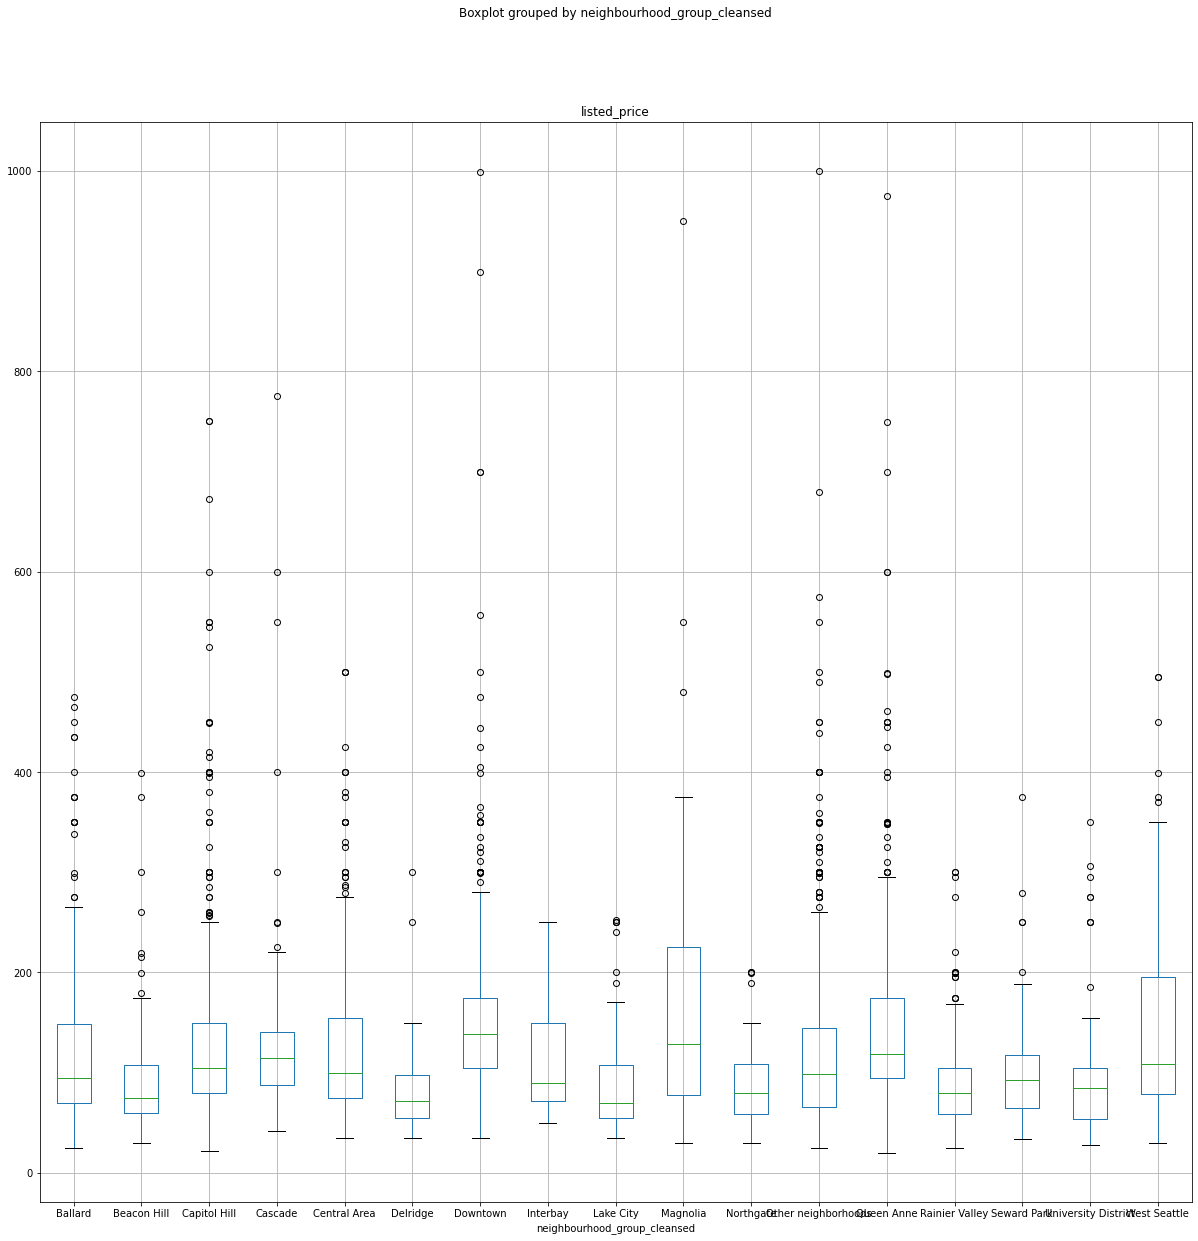

In [101]:
df.boxplot('listed_price', by='neighbourhood_group_cleansed', figsize=(20, 20))

In [102]:
mod = ols('listed_price ~ neighbourhood_group_cleansed', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                    sum_sq      df          F        PR(>F)
neighbourhood_group_cleansed  1.747772e+06    16.0  14.150561  5.984737e-38
Residual                      2.934195e+07  3801.0        NaN           NaN


In [103]:
tukey = pairwise_tukeyhsd(endog=df['listed_price'],     
                          groups=list(df['neighbourhood_group_cleansed']),
                          alpha=0.05)          

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ballard,Beacon Hill,-30.0131,0.1771,-64.4464,4.4202,False
Ballard,Capitol Hill,5.91,0.9,-17.8621,29.6821,False
Ballard,Cascade,15.4185,0.9,-22.5419,53.3789,False
Ballard,Central Area,3.6561,0.9,-21.8903,29.2026,False
Ballard,Delridge,-41.4041,0.0302,-81.0589,-1.7493,True
Ballard,Downtown,29.7231,0.0023,5.7127,53.7334,True
Ballard,Interbay,-14.9553,0.9,-108.8071,78.8964,False
Ballard,Lake City,-32.011,0.4137,-74.2264,10.2044,False
Ballard,Magnolia,52.9895,0.0034,9.1958,96.7832,True
Ballard,Northgate,-36.1326,0.12,-75.6025,3.3373,False


In [66]:
# fuction for filling numeric and categorical varables

def clean_data(df):
# Fill numeric columns 
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X
    


In [67]:
# choose variables of intest anad fill NaN
#df=listings_raw[['neighbourhood', 'property_type', 'zipcode','room_type','bed_type', 'accommodates', 'bedrooms','bathrooms', 'listed_price']]

df=listings_raw[['neighbourhood_group_cleansed', 'property_type', 'beds', 'square_feet', 'guests_included','room_type','bed_type', 'accommodates', 'bedrooms','bathrooms', 'listed_price']]
df.columns
#df_cor=df.corr().sort_values(by='listed_price',ascending=False)
#df_cor['listed_price']


Index(['neighbourhood_group_cleansed', 'property_type', 'beds', 'square_feet',
       'guests_included', 'room_type', 'bed_type', 'accommodates', 'bedrooms',
       'bathrooms', 'listed_price'],
      dtype='object')

In [18]:
# choose variables of intest anad fill NaN

fill_df=clean_data(df)

fill_df.columns


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Index(['beds', 'square_feet', 'guests_included', 'accommodates', 'bedrooms',
       'bathrooms', 'listed_price', 'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'propert

In [110]:
#Split into explanatory and response variables
X = fill_df.drop(['listed_price'], axis=1)
y = fill_df['listed_price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)



In [111]:
rsquared_score #result suggests the prediction was poor?

0.5884586764475759